# <center>Cryptocurrency Analysis - <font color='orange'>DOGE</font> vs. Everybody</center>

This program will observe and analyze Dogecoin's performance in the market compared to crypto giants Bitcoin, Litecoin, and Ethereum.

data source: <src>https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory</src>

## Extract and Transform Data

In [70]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load datasets into a dataframes

doge_df = pd.read_csv('archive/coin_Dogecoin.csv')
bc_df = pd.read_csv('archive/coin_Bitcoin.csv')
eth_df = pd.read_csv('archive/coin_Ethereum.csv')
lc_df = pd.read_csv('archive/coin_Litecoin.csv')

In [4]:
# Examine dataframes

coin_list = [doge_df,bc_df,eth_df,lc_df]

for df in coin_list:
    display(df.head())

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.0,1.509085e+06
1,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.0,2.169688e+06
2,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.0,3.188943e+06
3,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.0,1.115034e+07
4,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.0,7.284337e+06


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Litecoin,LTC,2013-04-29 23:59:59,4.57360,4.22564,4.36676,4.38390,0.0,7.538896e+07
1,2,Litecoin,LTC,2013-04-30 23:59:59,4.57238,4.16896,4.40352,4.29649,0.0,7.402092e+07
2,3,Litecoin,LTC,2013-05-01 23:59:59,4.35686,3.52029,4.28954,3.80101,0.0,6.560460e+07
3,4,Litecoin,LTC,2013-05-02 23:59:59,4.03930,3.00717,3.78002,3.37198,0.0,5.828798e+07
4,5,Litecoin,LTC,2013-05-03 23:59:59,3.45361,2.39594,3.39044,3.04491,0.0,5.269485e+07


In [138]:
# I want to compare closing prices of the coins, so I will combine them into one data frame
# using only the Date and Close columns

doge = doge_df.loc[:,['Date','Close']]
doge.rename(columns={'Close':'DOGE'}, inplace=True)
doge.head()

bc = bc_df[['Date','Close']].copy()
bc.rename(columns={'Close':'BTC'}, inplace=True)

eth = eth_df[['Date','Close']].copy()
eth.rename(columns={'Close':'ETH'}, inplace=True)

lc = lc_df[['Date','Close']].copy()
lc.rename(columns={'Close':'LTC'}, inplace=True)

# Use list comprehension to set the index of all four dataframes to the Date column and change format
coins = [df.set_index(pd.DatetimeIndex(df['Date'].values).strftime('%m-%d-%Y')) for df in [bc,doge,eth,lc]]

# Concatenate the dataframes into one
df = pd.concat(coins, axis=1)

# Drop extra Date columns (since we are using the date as the index)
df.drop(['Date'], axis=1,inplace=True)

df

,BTC,DOGE,ETH,LTC
04-29-2013,144.539993,NaN,NaN,4.383900
04-30-2013,139.000000,NaN,NaN,4.296490
05-01-2013,116.989998,NaN,NaN,3.801010
05-02-2013,105.209999,NaN,NaN,3.371980
05-03-2013,97.750000,NaN,NaN,3.044910
...,...,...,...,...
02-23-2021,48824.426869,0.047392,1570.203925,176.934915
02-24-2021,49705.333316,0.056555,1626.575705,181.378501
02-25-2021,47093.853019,0.050167,1475.703735,178.901843
02-26-2021,46339.760083,0.050480,1446.033650,170.398153


In [168]:
# Not every coin existed in 2013, so we will replace all null values with 0
df.replace(np.NaN,0,inplace=True)
df.head()

,BTC,DOGE,ETH,LTC
04-29-2013,144.539993,0.0,0.0,4.38390
04-30-2013,139.000000,0.0,0.0,4.29649
05-01-2013,116.989998,0.0,0.0,3.80101
05-02-2013,105.209999,0.0,0.0,3.37198
05-03-2013,97.750000,0.0,0.0,3.04491


In [7]:
# Save cleaned dataframe to csv
#df.to_csv('archive/crypto_comparison.csv')

## Analyze Data

Now that the data is clean and in the desired format, I can now begin to analyze it.

In [140]:
# Examine data and get some statistics
print(df.dtypes)
print('\n')
print(f'This data frame has {df.shape[0]} rows and {df.shape[1]} columns.')
df.describe()

BTC     float64
DOGE    float64
ETH     float64
LTC     float64
dtype: object


This data frame has 2862 rows and 4 columns.


,BTC,DOGE,ETH,LTC
count,2862.000000,2862.000000,2862.000000,2862.000000
mean,4852.092547,0.002215,183.189015,41.955563
std,6975.105869,0.005903,285.699322,52.650729
min,68.431000,0.000000,0.000000,1.157010
25%,420.989243,0.000208,0.000000,3.752628
50%,1182.809998,0.000950,45.022051,23.933742
75%,7926.696939,0.002647,246.911324,58.475902
max,57539.943668,0.078825,1960.164744,358.335999


### Closing Price

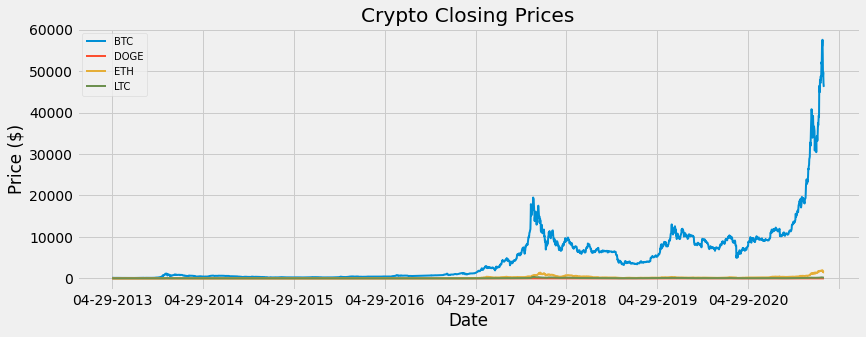

In [146]:
# Visualize the data
#plt.style.use('fivethirtyeight')

cryptos = df

fig, ax = plt.subplots(figsize=(12.5,4.5))

ax.plot(cryptos.index.values, cryptos, lw=2)
ax.set(xlabel="Date", ylabel="Price ($)", title="Crypto Closing Prices")
plt.legend(cryptos.columns.values, loc='upper left', fontsize=10)

# Format x-axis
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

ax.xaxis.set_major_locator(mdates.YearLocator())
#ax.xaxis.set_major_formatter(DateFormatter("%Y"))

It is difficult to see the plots for anything other than BTC due to its high price compared to DOGE, ETH, and LTC. To remedy this, I will scale the data.

In [10]:
# Scale data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))

# Get array of scaled data
scaled = min_max_scaler.fit_transform(cryptos)
scaled

array([[ 0.13242908,  0.        ,  0.        ,  0.90343786],
       [ 0.12278953,  0.        ,  0.        ,  0.87896554],
       [ 0.08449229,  0.        ,  0.        ,  0.74024509],
       ...,
       [81.8238808 , 63.64385663, 75.284679  , 49.76351874],
       [80.51176476, 64.04032928, 73.77102639, 47.3827265 ],
       [80.24848857, 63.53673341, 74.4821641 , 47.85932061]])

In [151]:
# Convert scaled data into data frame

df_scale = pd.DataFrame(scaled, columns=df.columns)
df_scale.set_index(df.index.values, inplace=True)
df_scale.head()

,BTC,DOGE,ETH,LTC
04-29-2013,0.132429,0.0,0.0,0.903438
04-30-2013,0.122790,0.0,0.0,0.878966
05-01-2013,0.084492,0.0,0.0,0.740245
05-02-2013,0.063995,0.0,0.0,0.620129
05-03-2013,0.051015,0.0,0.0,0.528559


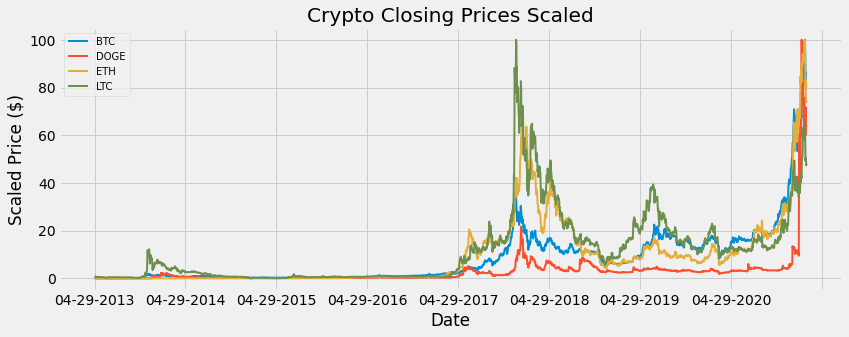

In [153]:
# Visualize the scaled dataframe
cryptos = df_scale

fig, ax = plt.subplots(figsize=(12.5,4.5))

ax.plot(cryptos.index.values, cryptos, lw=2)
ax.set(xlabel="Date", ylabel="Scaled Price ($)", title="Crypto Closing Prices Scaled")
plt.legend(cryptos.columns.values, loc='upper left', fontsize=10)
ax.xaxis.set_major_locator(mdates.YearLocator())

### Daily Simple Return

In [166]:
# get the daily simple return

DSR = df.pct_change()
DSR.head()

,BTC,DOGE,ETH,LTC
04-29-2013,NaN,NaN,NaN,NaN
04-30-2013,-0.038328,NaN,NaN,-0.019939
05-01-2013,-0.158345,NaN,NaN,-0.115322
05-02-2013,-0.100692,NaN,NaN,-0.112873
05-03-2013,-0.070906,NaN,NaN,-0.096996


In [155]:
# Remove NaN to only compare data when all coins were available
DSR.dropna(inplace=True)
DSR

,BTC,DOGE,ETH,LTC
08-08-2015,-0.066484,-0.059557,inf,-0.084008
08-09-2015,0.015655,0.022199,-0.068268,0.011373
08-10-2015,-0.002313,-0.010966,0.009333,0.012900
08-11-2015,0.022369,0.022920,0.507323,0.053349
08-12-2015,-0.014831,-0.020775,0.140075,-0.041856
...,...,...,...,...
02-23-2021,-0.099302,-0.117880,-0.118850,-0.149788
02-24-2021,0.018042,0.193352,0.035901,0.025114
02-25-2021,-0.052539,-0.112952,-0.092754,-0.013655
02-26-2021,-0.016013,0.006230,-0.020106,-0.047533


In [157]:
# Still have a row with an inf value for ETH, so we will drop that row
DSR.drop(['08-08-2015'], inplace=True)

In [158]:
DSR

,BTC,DOGE,ETH,LTC
08-09-2015,0.015655,0.022199,-0.068268,0.011373
08-10-2015,-0.002313,-0.010966,0.009333,0.012900
08-11-2015,0.022369,0.022920,0.507323,0.053349
08-12-2015,-0.014831,-0.020775,0.140075,-0.041856
08-13-2015,-0.008619,-0.024660,0.501240,-0.026373
...,...,...,...,...
02-23-2021,-0.099302,-0.117880,-0.118850,-0.149788
02-24-2021,0.018042,0.193352,0.035901,0.025114
02-25-2021,-0.052539,-0.112952,-0.092754,-0.013655
02-26-2021,-0.016013,0.006230,-0.020106,-0.047533


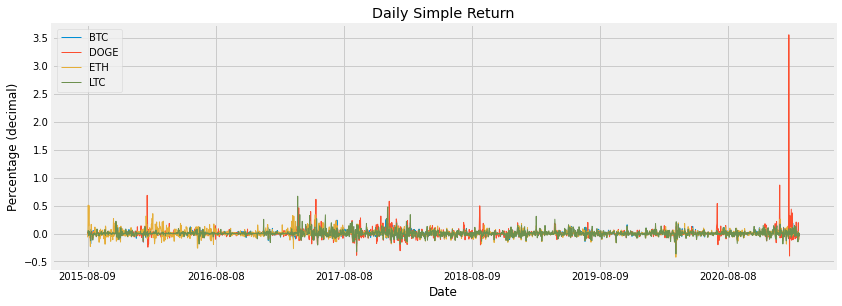

In [113]:
# Visualize DSR
fig, ax = plt.subplots(figsize=(12.5,4.5))

ax.plot(DSR.index.values,DSR, lw=1)
ax.set(xlabel="Date", ylabel="Percentage (decimal)",
       title="Daily Simple Return")
plt.legend(DSR.columns.values, loc='upper left', fontsize=10)

# Format the x axis
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

ax.xaxis.set_major_locator(mdates.YearLocator())

The graph shows the largest jumps in daily simple return for <b>DOGE</b> during mid-year 2020 and early 2021. As of 2/27/21, <b>DOGE</b> is outperforming BTC, ETH, and LTC in daily simple return percentages.

### Volatility

In [64]:
# Get volatility (standard deviation)

print(f'The crypto volatility is:\n{DSR.std()}')

The crypto volatility is:
BTC     0.039365
DOGE    0.105089
ETH     0.062911
LTC     0.057096
dtype: float64


Here, we see that Dogecoin has the most volatility compared to the other more established coins, which is expected. This makes it a higher risk cryptocurrency to invest in.

### Average Daily Return

In [67]:
# Get the average daily simple return

DSR.mean()

BTC     0.003335
DOGE    0.006039
ETH     0.005664
LTC     0.003425
dtype: float64

Dogecoin has the largest daily return on average as well.

### Correlation

In [68]:
# Get the correlation
DSR.corr()

,BTC,DOGE,ETH,LTC
BTC,1.000000,0.333598,0.495651,0.636964
DOGE,0.333598,1.000000,0.231998,0.309285
ETH,0.495651,0.231998,1.000000,0.476708
LTC,0.636964,0.309285,0.476708,1.000000


We can see that there is a moderate positive correlation between <b>LTC</b> and <b>BTC</b> daily simple return.

<AxesSubplot:>

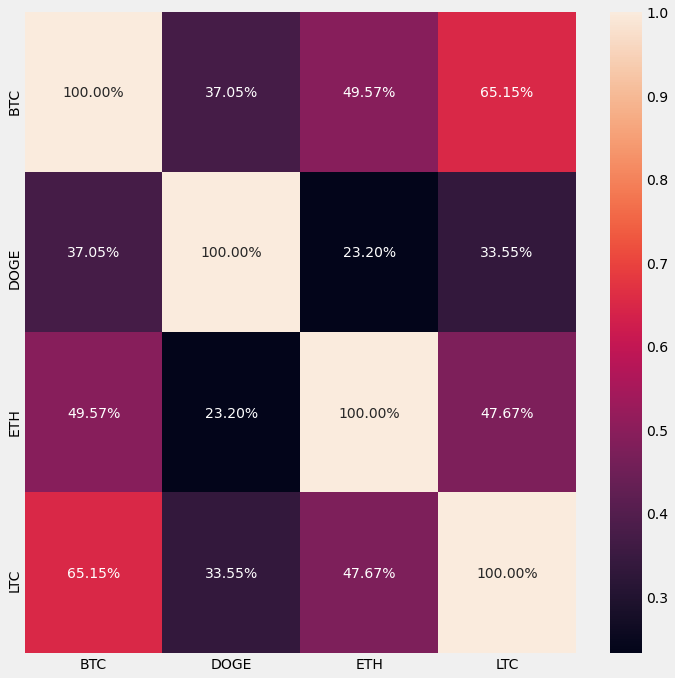

In [181]:
# Visualize the correlation

plt.subplots(figsize=(11,11))
sns.heatmap(DSR.corr(), annot=True, fmt='.2%')

### Daily Cumulative Simple Return

Here, I would like to see how much return I would've gotten if I had invested $1 in each of these cryptocurrencies back in 2015.

In [72]:
# Get the daily cumulative simple returns
DCSR = (DSR + 1).cumprod()
DCSR

,BTC,DOGE,ETH,LTC
2015-08-09,1.015655,1.022199,0.931732,1.011373
2015-08-10,1.013307,1.010989,0.940428,1.024419
2015-08-11,1.035974,1.034160,1.417529,1.079071
2015-08-12,1.020609,1.012676,1.616089,1.033906
2015-08-13,1.011812,0.987703,2.426137,1.006639
...,...,...,...,...
2021-02-23,187.068913,299.468262,2084.364591,45.900491
2021-02-24,190.444072,357.371127,2159.195217,47.053247
2021-02-25,180.438286,317.005196,1958.920471,46.410752
2021-02-26,177.549008,318.979996,1919.534966,44.204723


                   BTC        DOGE          ETH        LTC
2021-02-27  176.969274  316.471624  1938.038893  44.646333


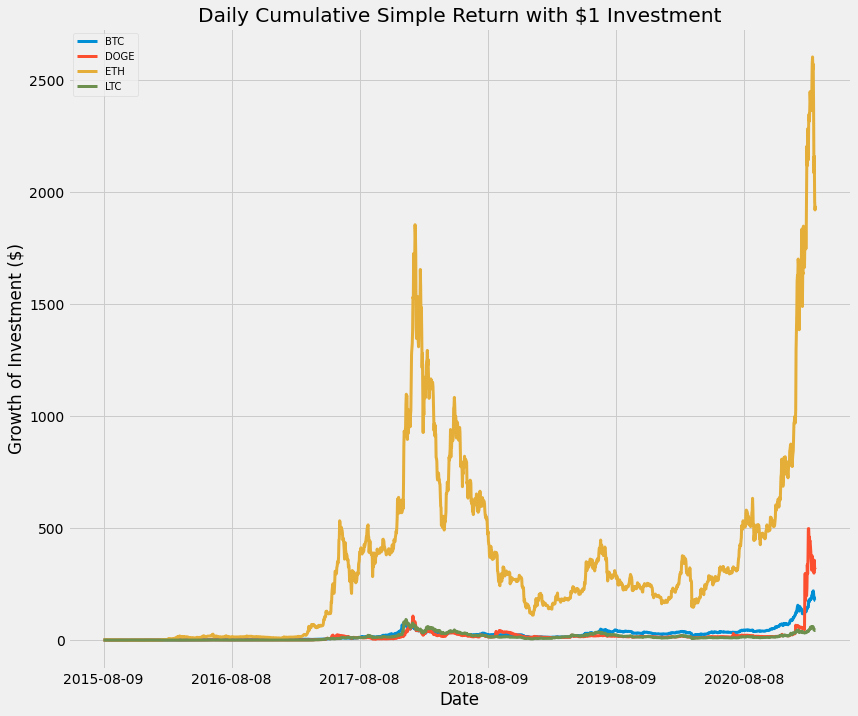

In [179]:
# Visualize the DCSR
fig, ax = plt.subplots(figsize=(12.5,11))

ax.plot(DCSR.index.values,DCSR, lw=3)
ax.set(xlabel="Date", ylabel="Growth of Investment ($)",
       title="Daily Cumulative Simple Return with $1 Investment")
plt.legend(DCSR.columns.values, loc='upper left', fontsize=10)

# Format the x axis
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

ax.xaxis.set_major_locator(mdates.YearLocator())
#ax.xaxis.set_major_formatter(DateFormatter("%y"))

# Print final figures
print(DCSR.tail(1))

Had I invested a dollar in all four coins back in 2015, I would've seen the greatest return from <b>ETH</b> with a final value of
<b><font color='green'>$1938.04</font></b>!

<b>DOGE</b> comes in second with <b><font color='green'>316.47</font></b>.